### Core 8
## MLP Básica

### Descripcion
En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

Enlace al dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Objetivo:
El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

### Instrucciones:
1. Carga de datos:
  - Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
  - Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.
2. Exploración y preprocesamiento de datos:
  - Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
  - Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).
3. Implementación de la MLP:
  - Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
  - Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.
4. Entrenamiento del modelo:
  - Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
  - Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.
5. Evaluación del modelo:
  - Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
  - Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

***
## Desarrollo

### 1. Carga de datos

In [10]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# Cargar el dataset
file_path = '../data/BreastCancer.csv'
data = pd.read_csv(file_path)
print("\nPrimeras filas del dataset:")
print(data.head())


Primeras filas del dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

In [3]:
# Verificar valores nulos
print("\nValores nulos en cada columna:")
print(data.isnull().sum())

# Descripción estadística general
print("\nResumen estadístico del dataset:")
print(data.describe())


Valores nulos en cada columna:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

### 2. Exploración y preprocesamiento de datos

In [4]:
# Separar las características (X) y el target (y)
X = data.drop(['diagnosis'], axis=1)  # Elimina la columna 'diagnosis' (objetivo)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convierte la clasificación en 1 (Maligno) y 0 (Benigno)

In [5]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [6]:
# División del dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 3. Implementación de la MLP

In [11]:
# Creación del modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta con 64 neuronas
    Dropout(0.3),  # Regularización para reducir sobreajuste
    Dense(32, activation='relu'),  # Segunda capa oculta con 32 neuronas
    Dropout(0.3),  # Regularización adicional
    Dense(16, activation='relu'),  # Tercera capa oculta con 16 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Entrenamiento del modelo

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6680 - loss: 0.6929 - val_accuracy: 0.6374 - val_loss: 0.6921
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6130 - loss: 0.6921 - val_accuracy: 0.6374 - val_loss: 0.6911
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6360 - loss: 0.6909 - val_accuracy: 0.6374 - val_loss: 0.6900
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6514 - loss: 0.6894 - val_accuracy: 0.6374 - val_loss: 0.6890
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6596 - loss: 0.6880 - val_accuracy: 0.6374 - val_loss: 0.6879
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6274 - loss: 0.6881 - val_accuracy: 0.6374 - val_loss: 0.6870
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6118 - loss: 0.6880 - val_accuracy: 0.6374 - val_loss: 0.6861
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6368 - loss: 0.6859 - val_accuracy: 0.6374 - 

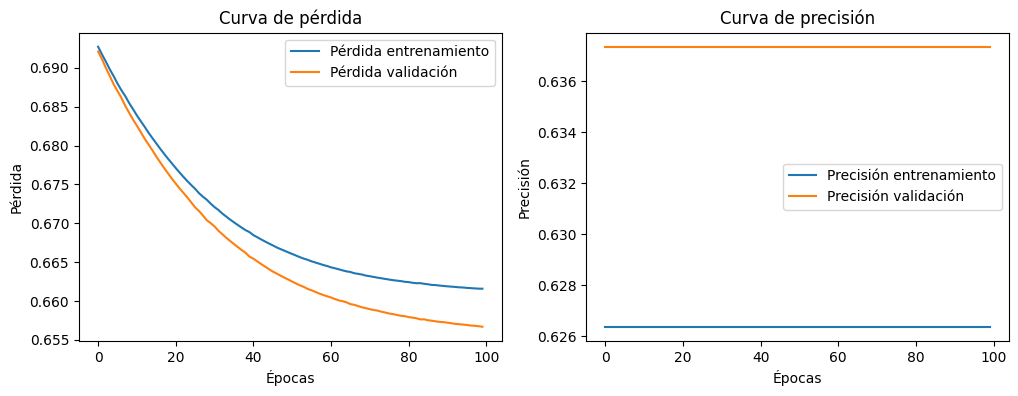

In [12]:
# Entrenamiento durante 50 épocas
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16, verbose=1)

# Visualizar curvas de aprendizaje
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### 5. Evaluación del modelo

In [13]:
# Predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluación con métricas
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la precisión
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Matriz de confusión:
[[71  0]
 [43  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114


Precisión en el conjunto de prueba: 0.62


c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114
